# 🩺 Breast Cancer Classification Project

## 1. Dataset Description
We will be working with the **Breast Cancer Wisconsin Diagnostic Dataset**.  
- The dataset contains **569 records** of patients.  
- Each record has **30 numerical features** (e.g., radius, texture, perimeter, smoothness, etc.) that describe characteristics of cell nuclei present in breast cancer tissue.  
- The **target variable** is `Diagnosis`, which has two classes:
  - **M (Malignant)**
  - **B (Benign)**  

This is a **binary classification problem**, and we will use **Logistic Regression** to build our model.





## 2. Project Tasks

### 🔍 Step 1: Data Investigation
- Load the dataset and display its first few rows.
- Check for **null values** and **duplicate entries**.
- Explore the dataset summary (shape, data types, statistics).

### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not

### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.

### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.

### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.

### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?


### Data Investigation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [4]:
# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)

In [5]:
data.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.tail()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
data.shape

(569, 32)

In [8]:
data.columns

Index(['ID number', 'Diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
data.columns.nunique()

32

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data.dtypes.array

<NumpyExtensionArray>
[  dtype('int64'),       dtype('O'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]
Length: 32, dtype: object

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID number,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [13]:
data.isna().sum()

ID number                  0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
data['Diagnosis'].dtype

dtype('O')

In [59]:
data['Diagnosis']=[1 if x=="M" else 0 for x in data['Diagnosis']]

In [20]:
data['Diagnosis'].dtype

dtype('int64')

In [21]:
data.drop(['ID number'],axis=1,inplace=True)

### Data Visualization

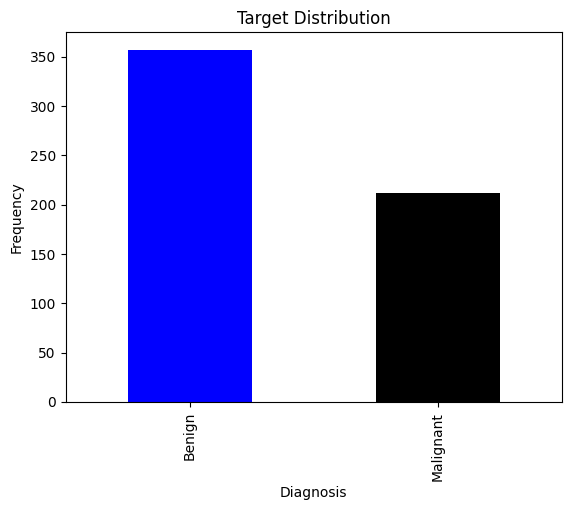

In [22]:
# The Distribution of Diagnosis column(Target)
data['Diagnosis'].value_counts().plot(kind='bar',color=['blue','black'])
plt.title('Target Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

The Frequency of Benign Diagnosis is greater than the frequency of Malignant Diagnosis.

In [23]:
numeric_columns=data.select_dtypes(include=['float64','int64'])
numeric_columns

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


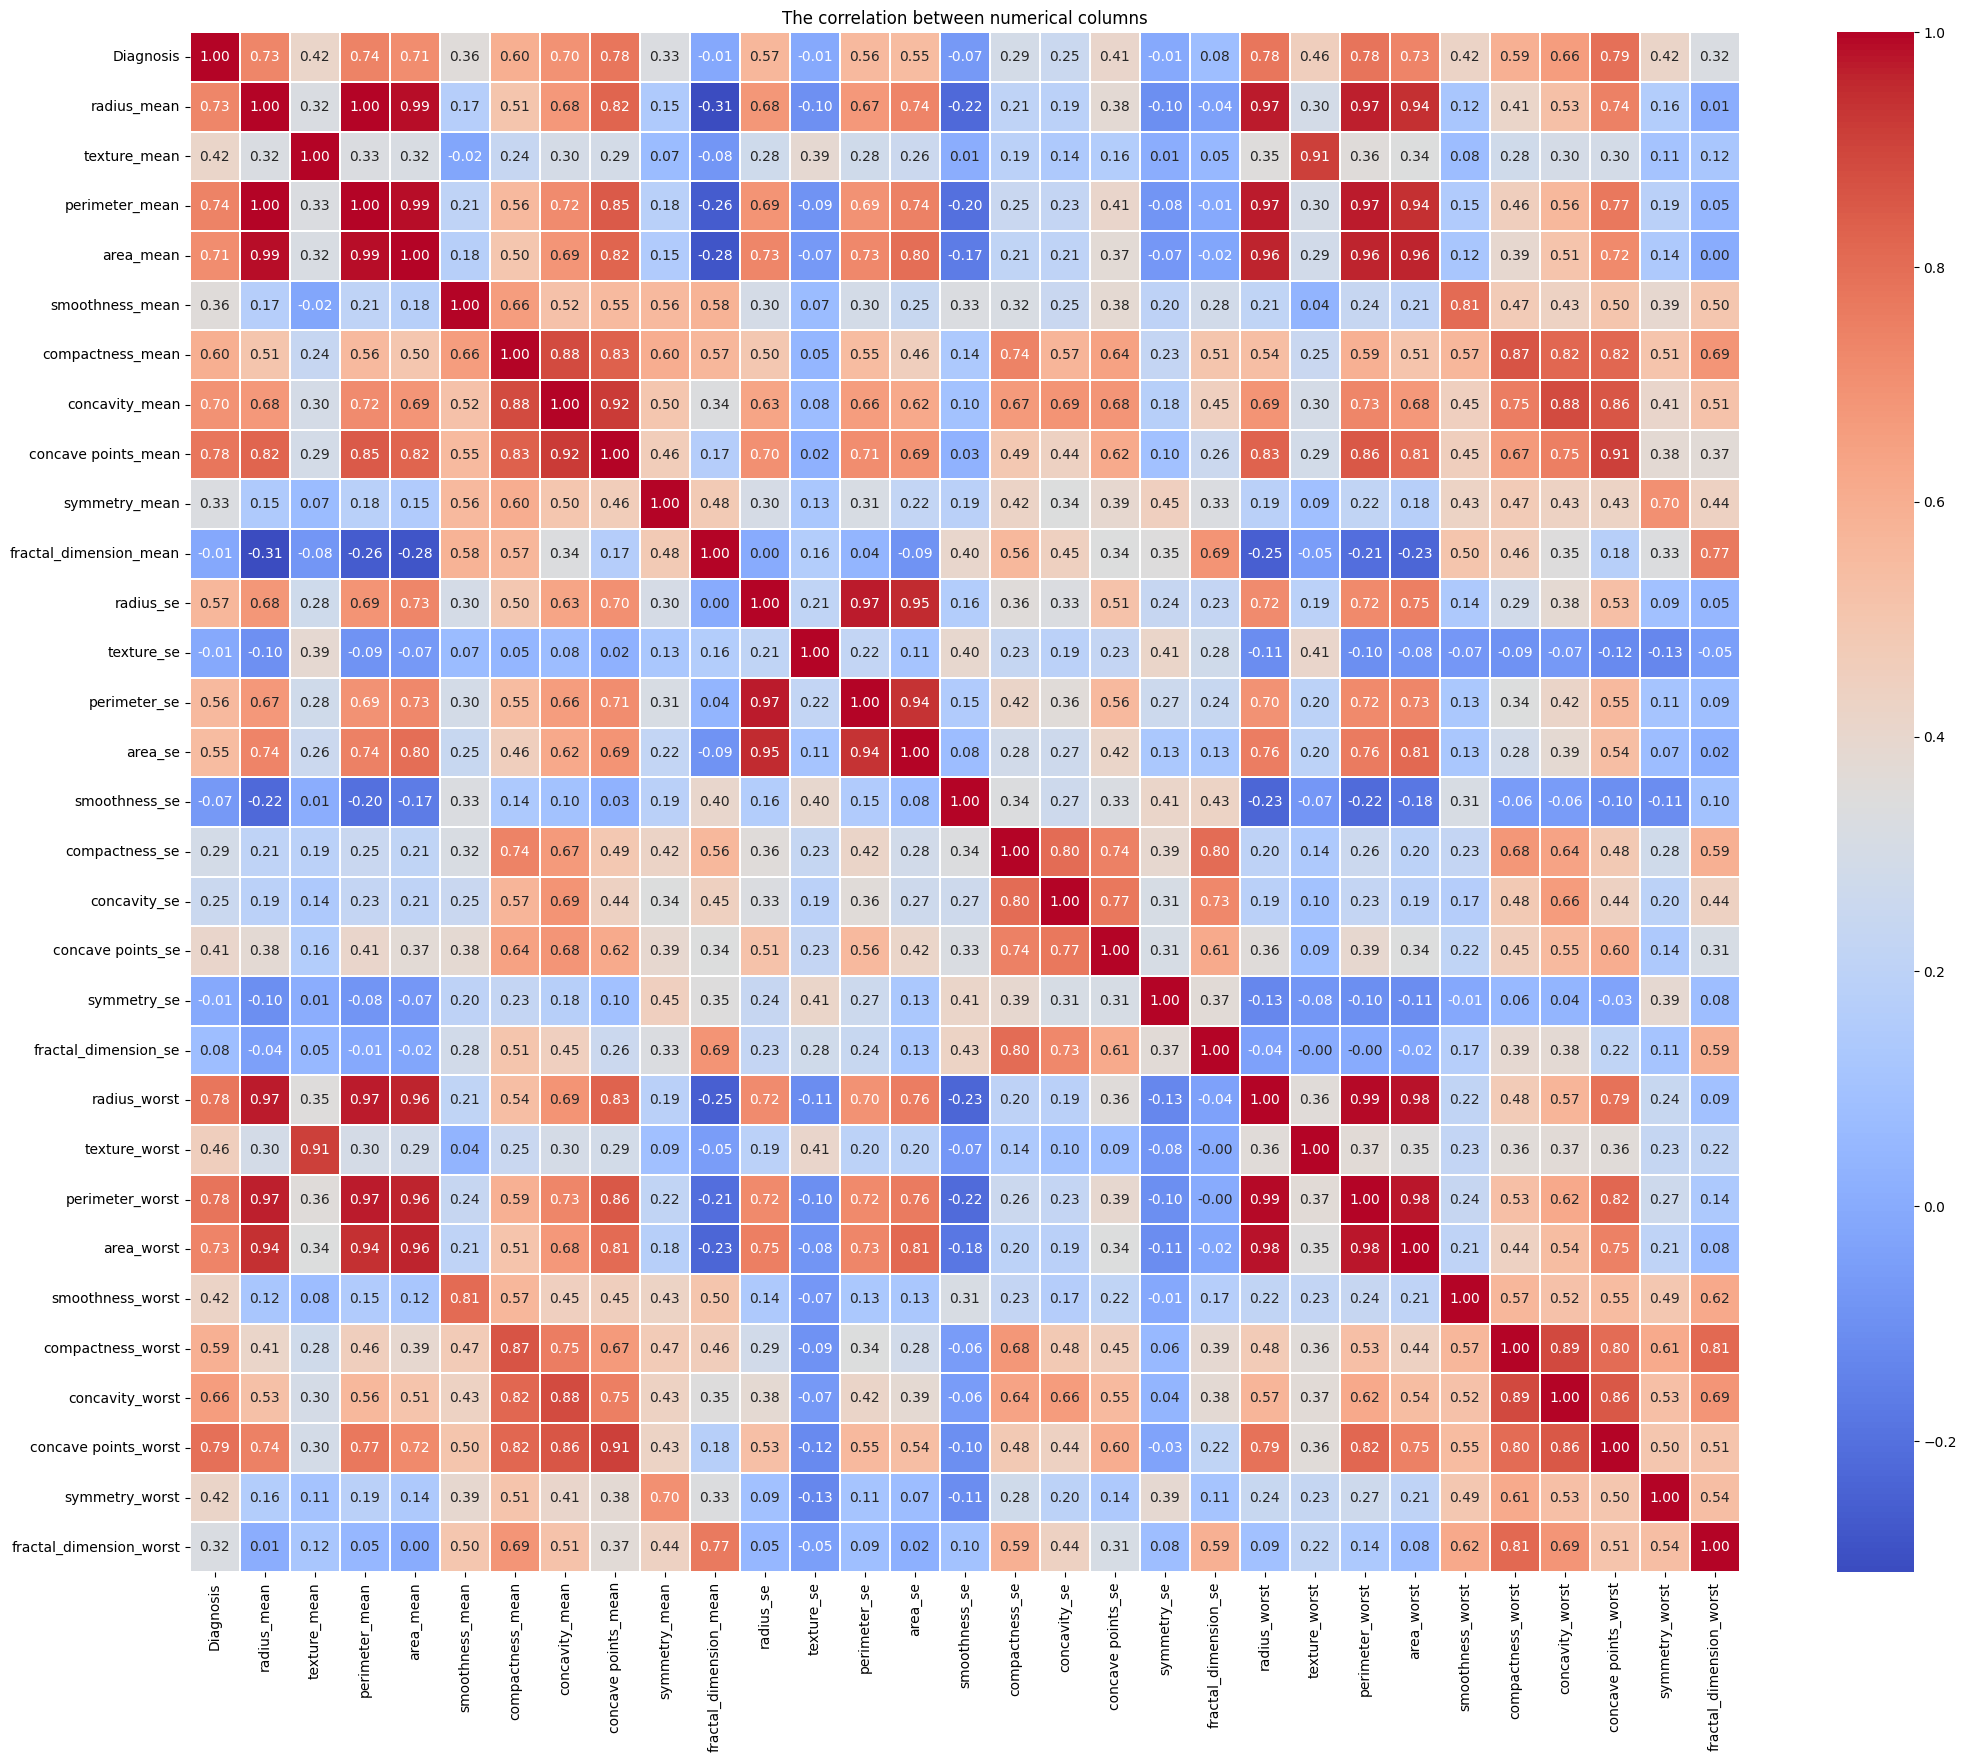

In [24]:
# The Correlation between numerical features
correlation_metrix=numeric_columns.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlation_metrix,linewidths=0.3,annot=True,fmt='0.2f',cmap='coolwarm')
plt.title('The correlation between numerical columns')
plt.show()

The Diagnosis has a strong relation with (perimeter mean,radius_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,concavity_worst,radius_worst,concave points_worst).

In [25]:
data.columns

Index(['Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0.5, 1.0, 'The columns that have correlation with Diagnosis')

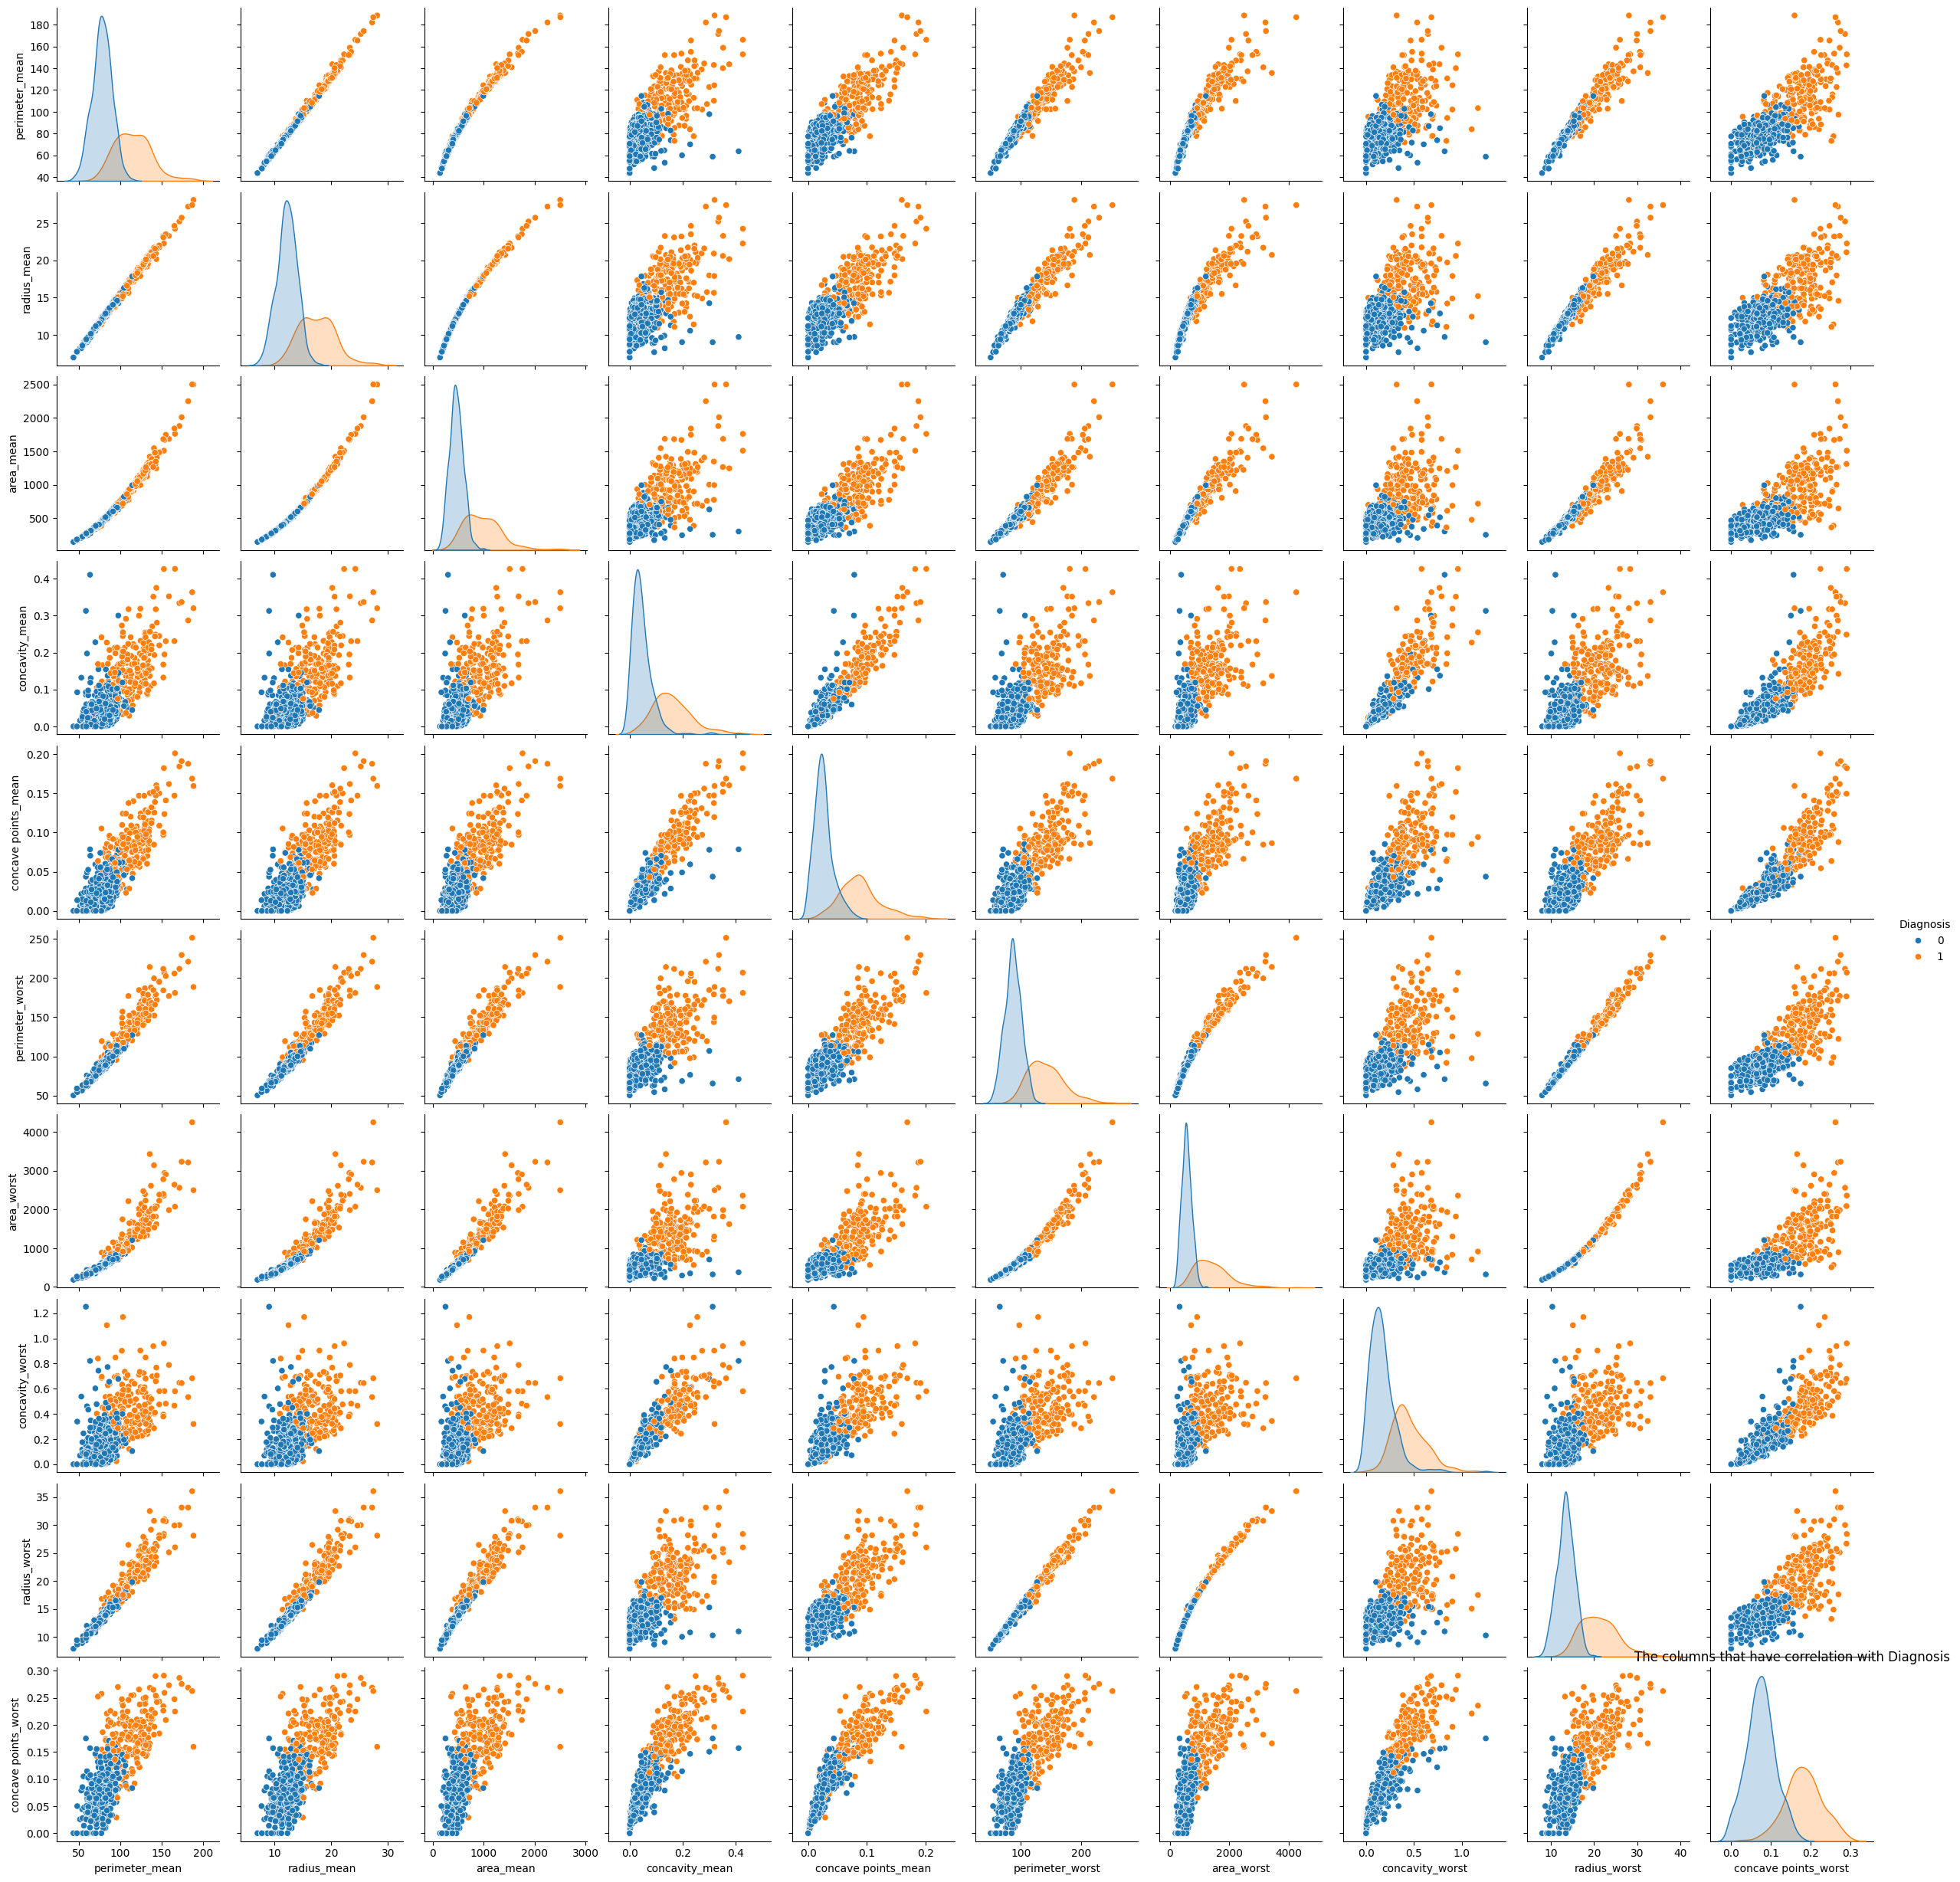

In [26]:
# The correlation between Diagnosis and all columns have a direct relation with it
correlation_with_diagnosis=data[['Diagnosis','perimeter_mean','radius_mean','area_mean','concavity_mean','concave points_mean',
                            'perimeter_worst','area_worst','concavity_worst','radius_worst','concave points_worst']]
sns.pairplot(correlation_with_diagnosis,hue='Diagnosis')
plt.title('The columns that have correlation with Diagnosis')

In [27]:
# The mean features that have direct correlation with Target column
mean_correlation_with_diagnosis=data[['perimeter_mean','radius_mean','area_mean','concavity_mean','concave points_mean']]
mean_correlation_with_diagnosis

,perimeter_mean,radius_mean,area_mean,concavity_mean,concave points_mean
0,122.80,17.99,1001.0,0.30010,0.14710
1,132.90,20.57,1326.0,0.08690,0.07017
2,130.00,19.69,1203.0,0.19740,0.12790
3,77.58,11.42,386.1,0.24140,0.10520
4,135.10,20.29,1297.0,0.19800,0.10430
...,...,...,...,...,...
564,142.00,21.56,1479.0,0.24390,0.13890
565,131.20,20.13,1261.0,0.14400,0.09791
566,108.30,16.60,858.1,0.09251,0.05302
567,140.10,20.60,1265.0,0.35140,0.15200


<Axes: xlabel='concave points_mean', ylabel='Count'>

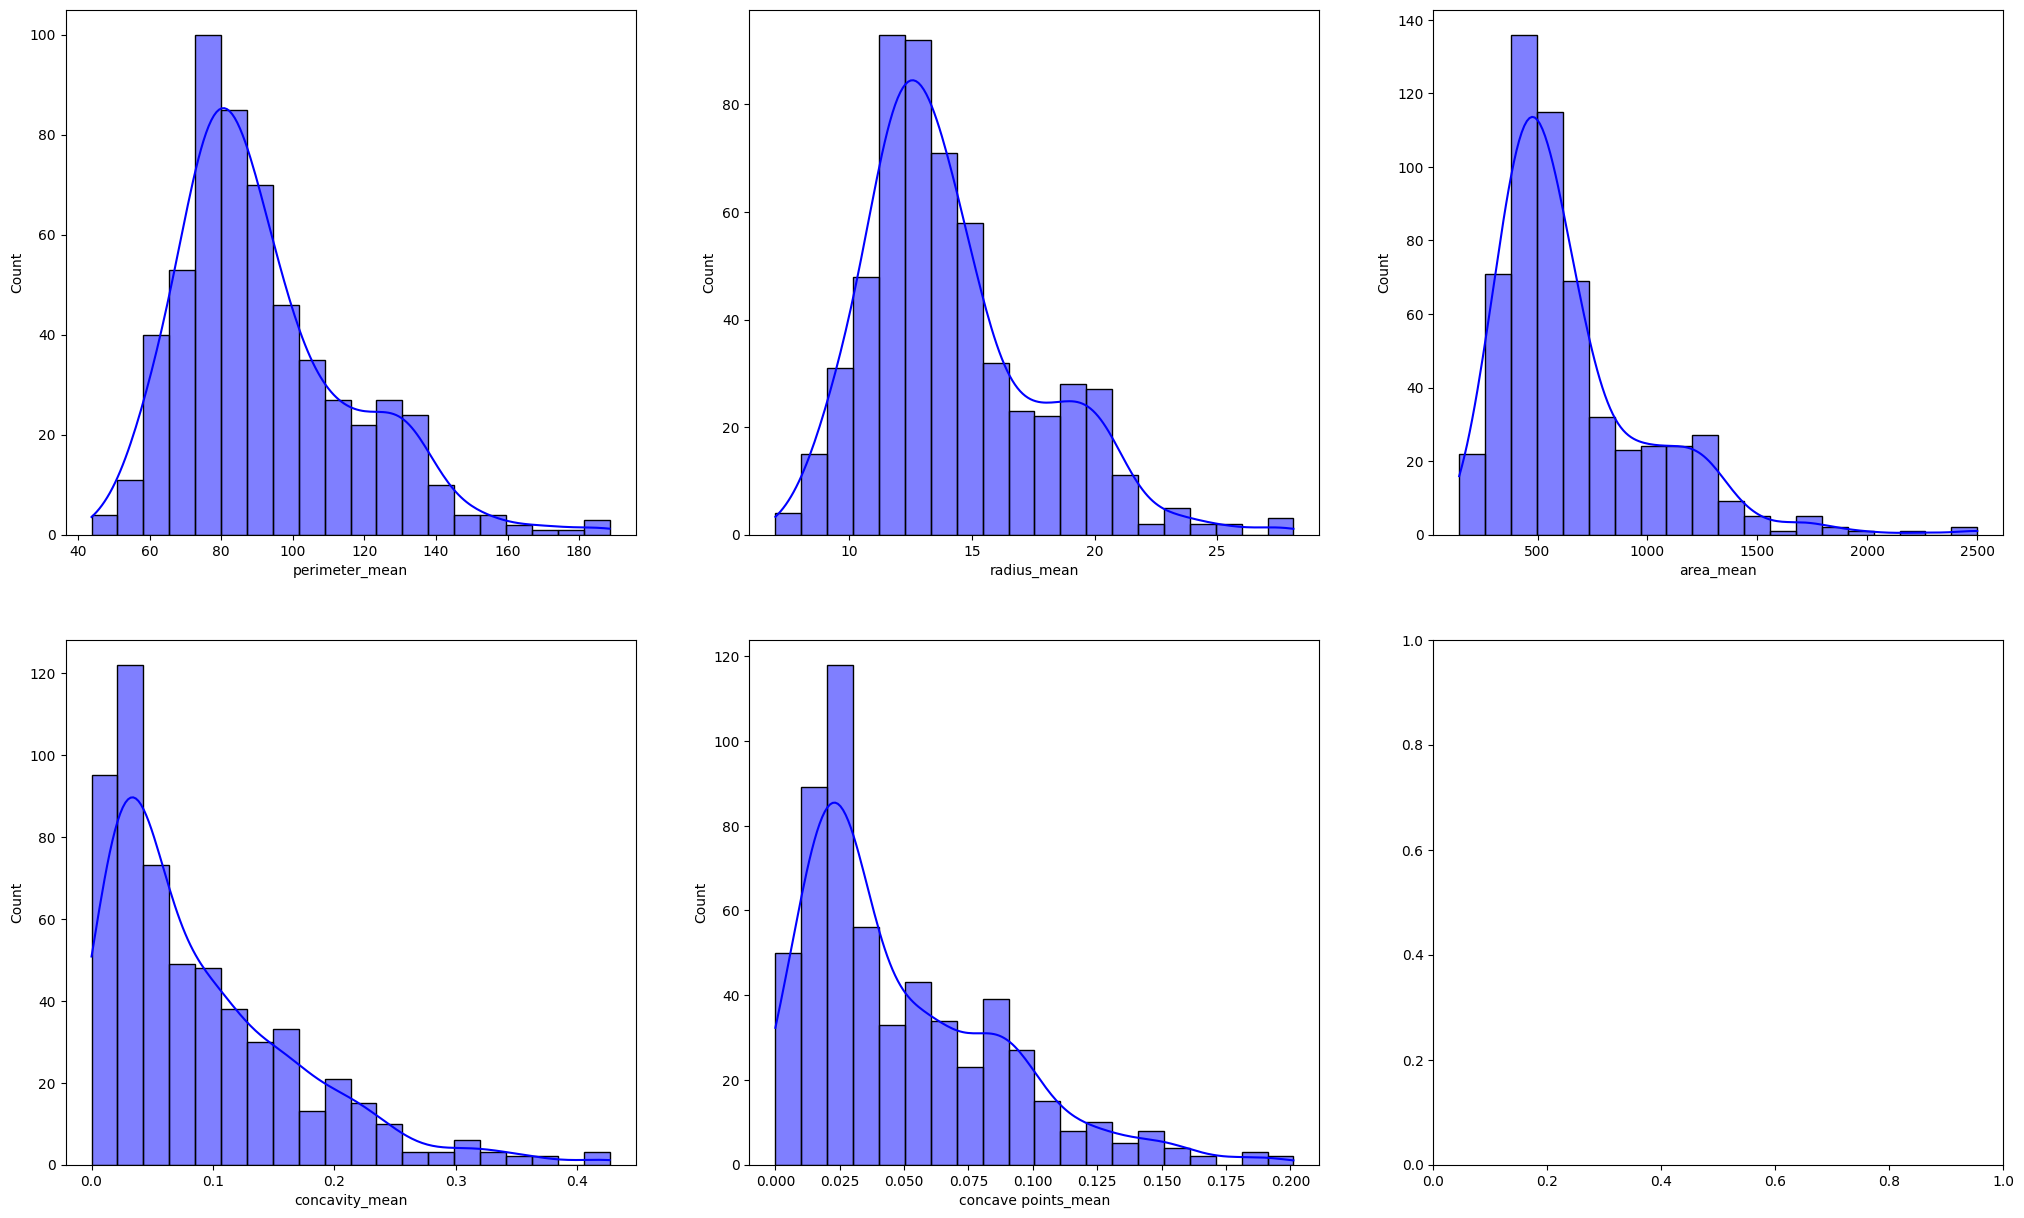

In [28]:
# The distribution of the mean features that have direct correlation with Target column
fig,ax=plt.subplots(2,3,figsize=(25,15))
sns.histplot(data['perimeter_mean'],bins=20,ax=ax[0,0],color='blue',kde=True)
sns.histplot(data['radius_mean'],bins=20,ax=ax[0,1],color='blue',kde=True)
sns.histplot(data['area_mean'],bins=20,ax=ax[0,2],color='blue',kde=True)
sns.histplot(data['concavity_mean'],bins=20,ax=ax[1,0],color='blue',kde=True)
sns.histplot(data['concave points_mean'],bins=20,ax=ax[1,1],color='blue',kde=True)

Right Skewed Data.

In [29]:
# The worst features that have direct correlation with Target column
worst_correlation_with_diagnosis=data[['perimeter_worst','area_worst','concavity_worst','radius_worst','concave points_worst']]
worst_correlation_with_diagnosis

,perimeter_worst,area_worst,concavity_worst,radius_worst,concave points_worst
0,184.60,2019.0,0.7119,25.380,0.2654
1,158.80,1956.0,0.2416,24.990,0.1860
2,152.50,1709.0,0.4504,23.570,0.2430
3,98.87,567.7,0.6869,14.910,0.2575
4,152.20,1575.0,0.4000,22.540,0.1625
...,...,...,...,...,...
564,166.10,2027.0,0.4107,25.450,0.2216
565,155.00,1731.0,0.3215,23.690,0.1628
566,126.70,1124.0,0.3403,18.980,0.1418
567,184.60,1821.0,0.9387,25.740,0.2650


<Axes: xlabel='concave points_worst', ylabel='Count'>

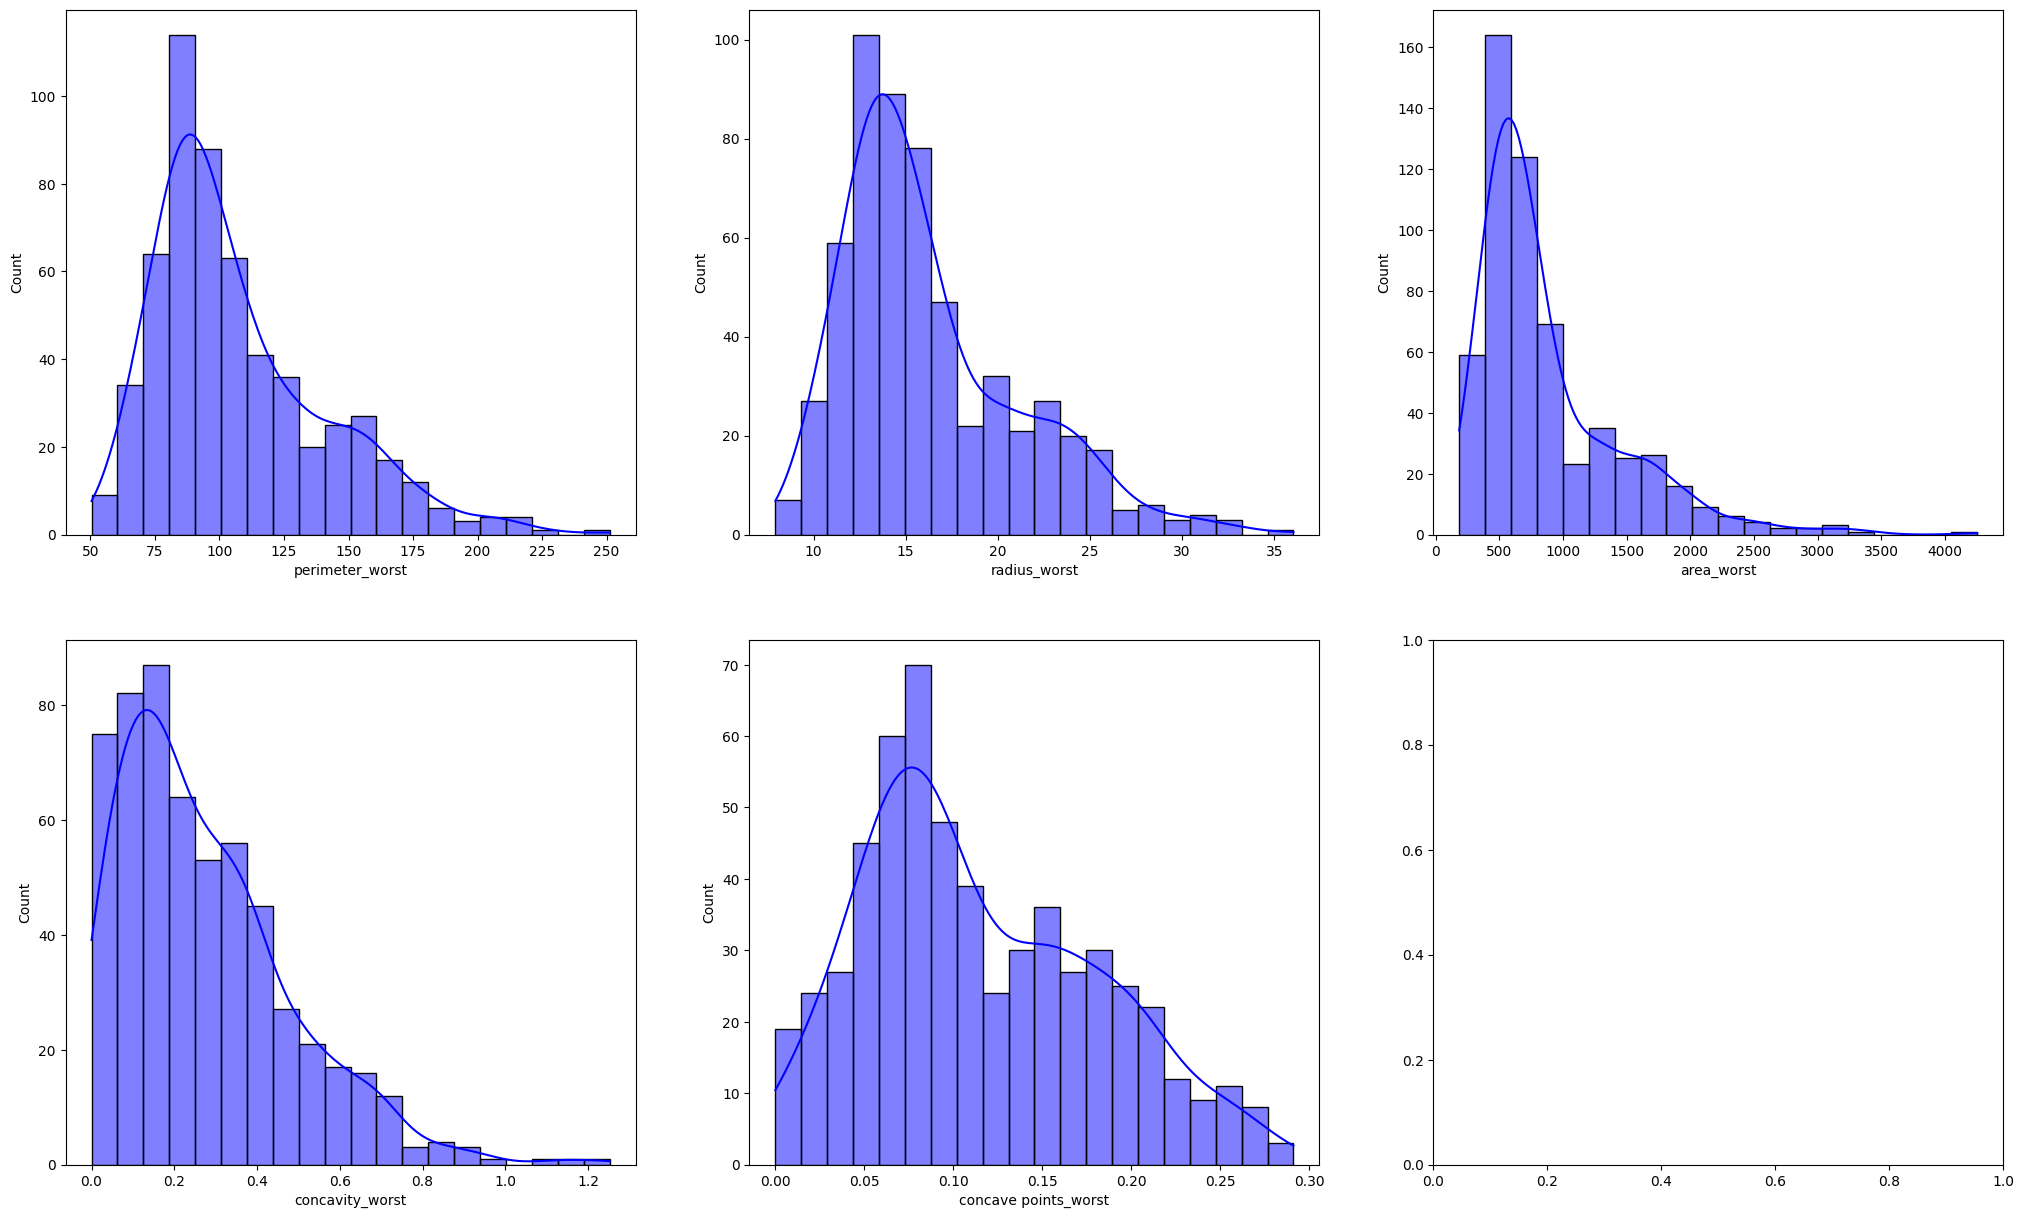

In [30]:
# The distribution of the worst features that have direct correlation with Target column
fig,ax=plt.subplots(2,3,figsize=(25,15))
sns.histplot(data['perimeter_worst'],bins=20,ax=ax[0,0],color='blue',kde=True)
sns.histplot(data['radius_worst'],bins=20,ax=ax[0,1],color='blue',kde=True)
sns.histplot(data['area_worst'],bins=20,ax=ax[0,2],color='blue',kde=True)
sns.histplot(data['concavity_worst'],bins=20,ax=ax[1,0],color='blue',kde=True)
sns.histplot(data['concave points_worst'],bins=20,ax=ax[1,1],color='blue',kde=True)

Right Skewed Data

<Axes: ylabel='concave points_worst'>

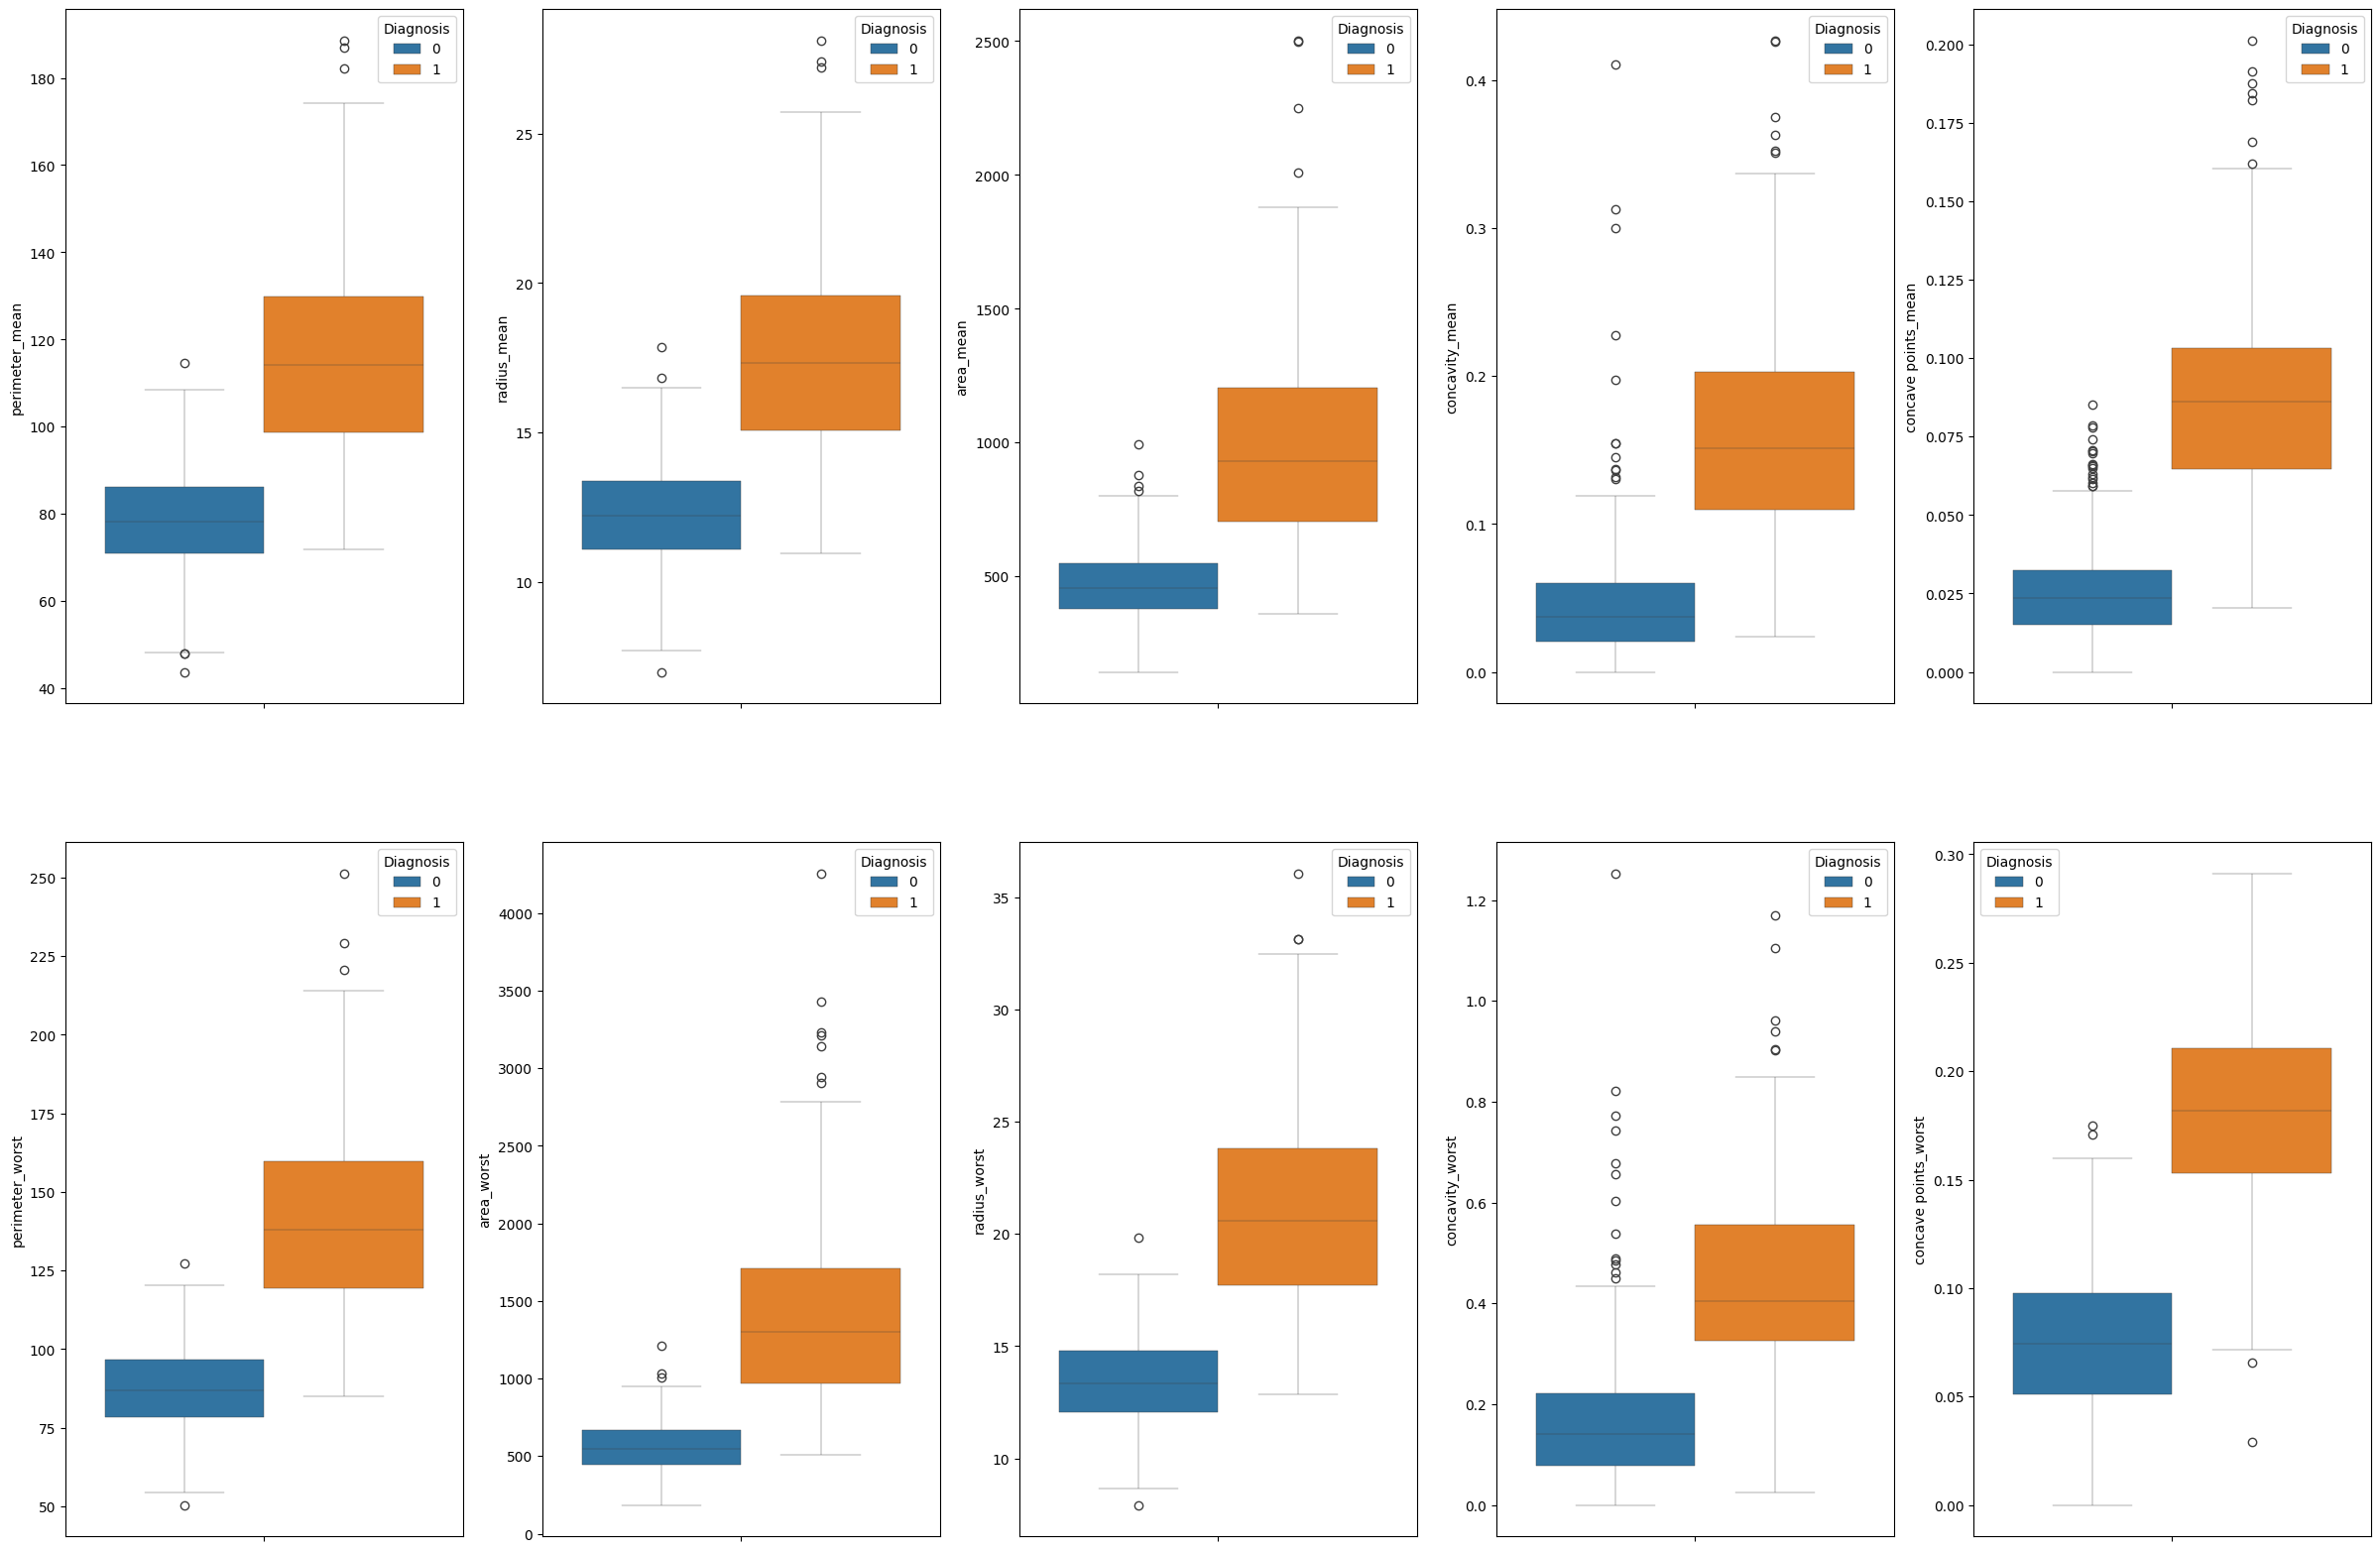

In [31]:
fig,ax=plt.subplots(2,5,figsize=(30,20))
sns.boxplot(data=data,y='perimeter_mean',ax=ax[0,0],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='radius_mean',ax=ax[0,1],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='area_mean',ax=ax[0,2],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='concavity_mean',ax=ax[0,3],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='concave points_mean',ax=ax[0,4],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='perimeter_worst',ax=ax[1,0],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='area_worst',ax=ax[1,1],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='radius_worst',ax=ax[1,2],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='concavity_worst',ax=ax[1,3],linewidth=0.3,hue='Diagnosis')
sns.boxplot(data=data,y='concave points_worst',ax=ax[1,4],linewidth=0.3,hue='Diagnosis')

### Train test split

In [32]:
# Splitting Features(independent variables) and Target(dependent variable)
X=data.drop(['Diagnosis'],axis=1)
y=data['Diagnosis']

In [33]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('y train shape:',y_train.shape)
print('y test shape:',y_test.shape)

X train shape: (455, 30)
X test shape: (114, 30)
y train shape: (455,)
y test shape: (114,)


In [36]:
numerical_features=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
numerical_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [37]:
preprocessing=ColumnTransformer(
    transformers=[('num',StandardScaler(),numerical_features)],
    remainder='drop'
)

In [38]:
X_train_transformed=preprocessing.fit_transform(X_train)
X_test_transformed=preprocessing.transform(X_test)

LogisticRegression

In [39]:
model=LogisticRegression(class_weight='balanced')
model.fit(X_train_transformed,y_train)

LogisticRegression(class_weight='balanced')

In [40]:
y_train_pred=model.predict(X_train_transformed)
y_test_pred=model.predict(X_test_transformed)
print('y train predictions:\n',y_train_pred[:10])
print('y test predictions:\n',y_test_pred[:10])

y train predictions:
 [1 0 0 1 1 1 0 1 1 1]
y test predictions:
 [0 1 0 1 1 0 1 0 0 0]


In [41]:
# Evaluation of the model
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))
print('\nClassification Report:\n',classification_report(y_test,y_test_pred))

Confusion Matrix:
 [[71  1]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



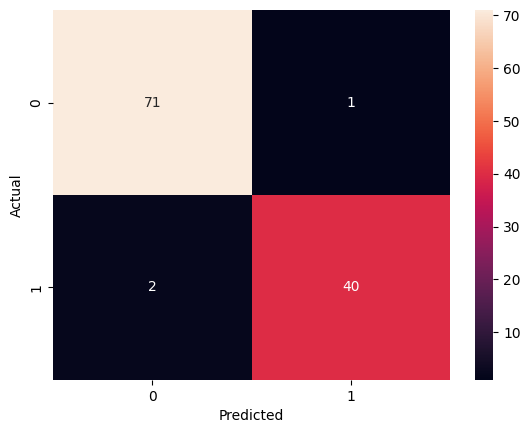

In [42]:
c_matrix=confusion_matrix(y_test,y_test_pred)
sns.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC and AUC

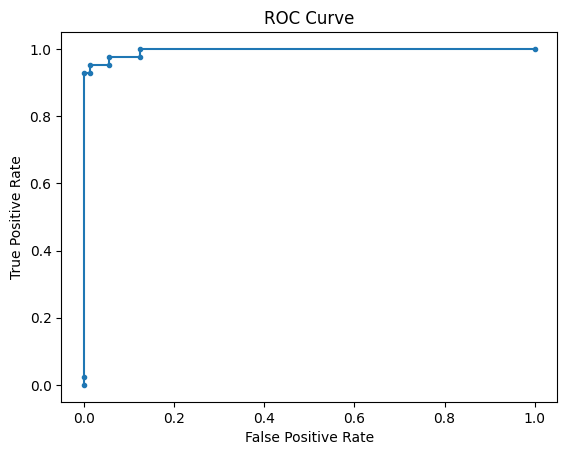

Auc Score: 0.9953703703703703


In [74]:
y_prob=model.predict_proba(X_test_transformed)[:, 1]
fpr,tpr,threshold_log=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,y_prob)
print(f'Auc Score: {auc_score}')

1) Model performing well on both train and test sets.
2) Model The model does not suffer from overfitting or underfitting.
3) false positives (1) and false negatives (2) model makes more mistakes in false negative (patient classified as healthy).
4) A sick person who is said to be healthy that may lead to complications or even loss of life.
5) In the medical field(Breast Cancer), the most important thing is to reduce false negatives.

In [91]:
# Reduce the threshold
threshold = 0.1
y_pred_custom = (y_prob >= threshold).astype(int)

In [92]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))


Confusion Matrix:
 [[64  8]
 [ 1 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        72
           1       0.84      0.98      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



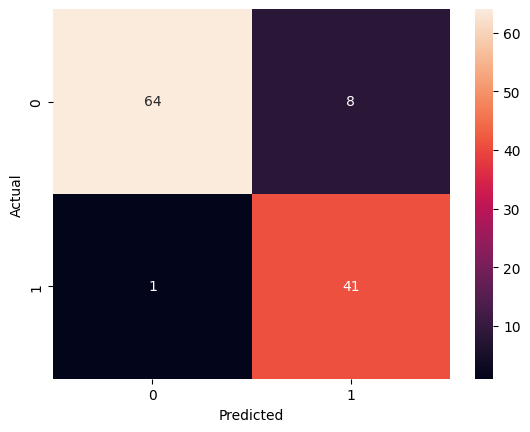

In [93]:
c_matrix_custom=confusion_matrix(y_test, y_pred_custom)
sns.heatmap(c_matrix_custom,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Reduce the threshold reduces false negatives but increases false positives.

RandomForestClassifier Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model1=RandomForestClassifier(class_weight='balanced')
model1.fit(X_train_transformed,y_train)

RandomForestClassifier(class_weight='balanced')

In [46]:
y_test_pred1=model1.predict(X_test_transformed)
print(y_test_pred1[:10])

[0 1 0 1 0 0 1 0 0 0]


In [47]:
# Evaluation of the model
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred1))
print('\nClassification Report:\n',classification_report(y_test,y_test_pred1))

Confusion Matrix:
 [[72  0]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



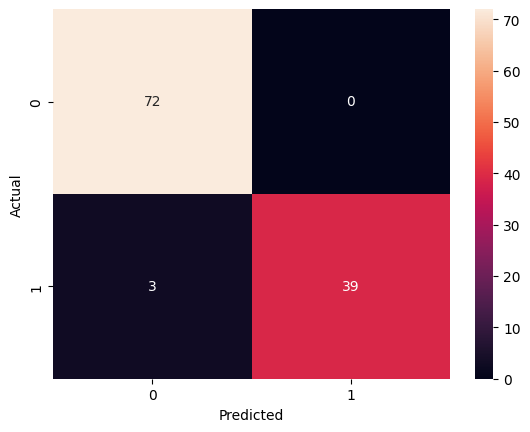

In [48]:
c_matrix1=confusion_matrix(y_test,y_test_pred1)
sns.heatmap(c_matrix1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

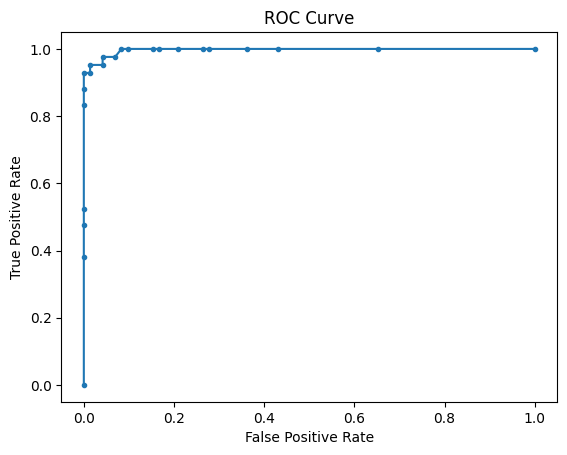

Auc Score: 0.9968584656084657


In [61]:
y_prob1=model1.predict_proba(X_test_transformed)[:, 1]
fpr1,tpr1,thresholds1=roc_curve(y_test,y_prob1)
plt.plot(fpr1,tpr1,marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score1=roc_auc_score(y_test,y_prob1)
print(f'Auc Score: {auc_score1}')

In [99]:
threshold1 = 0.2
y_pred_custom1= (y_prob1 >= threshold1).astype(int)

In [100]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom1))

Confusion Matrix:
 [[66  6]
 [ 0 42]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        72
           1       0.88      1.00      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



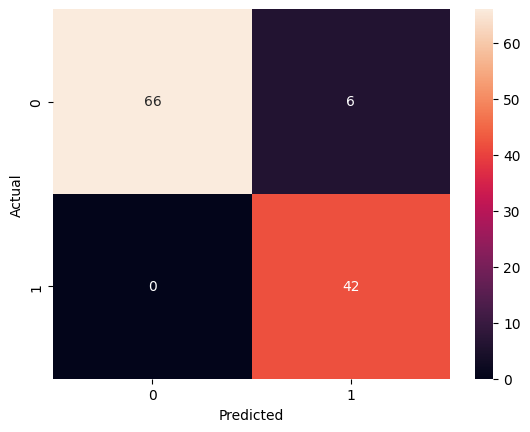

In [ ]:
c_matrix_custom1=confusion_matrix(y_test, y_pred_custom1)
sns.heatmap(c_matrix_custom1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

GradientBoostingClassifier Model

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
model2=GradientBoostingClassifier(random_state=42)
model2.fit(X_train_transformed,y_train)

GradientBoostingClassifier(random_state=42)

In [52]:
y_test_pred2=model2.predict(X_test_transformed)
print(y_test_pred2[:10])

[0 1 0 1 0 0 1 0 0 0]


In [53]:
# Evaluation of the model
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred2))
print('\nClassification Report:\n',classification_report(y_test,y_test_pred2))

Confusion Matrix:
 [[72  0]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



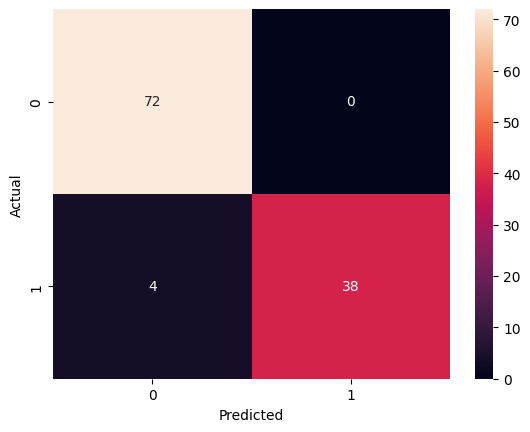

In [54]:
c_matrix2=confusion_matrix(y_test,y_test_pred2)
sns.heatmap(c_matrix2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

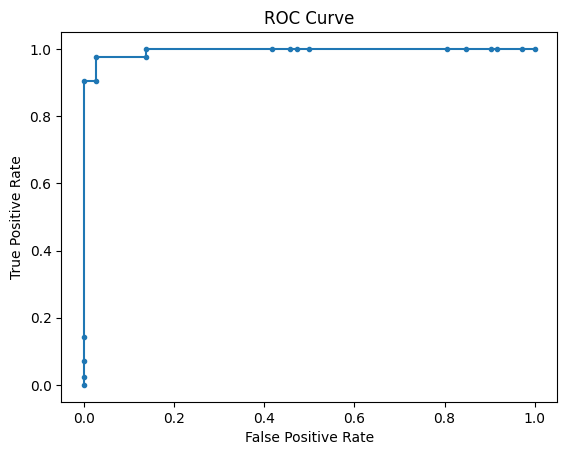

Auc Score: 0.9947089947089948


In [62]:
y_prob2=model2.predict_proba(X_test_transformed)[:, 1]
fpr2,tpr2,thresholds2=roc_curve(y_test,y_prob2)
plt.plot(fpr2,tpr2,marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score2=roc_auc_score(y_test,y_prob2)
print(f'Auc Score: {auc_score2}')

In [114]:
threshold2= 0.012
y_pred_custom2= (y_prob2 >= threshold2).astype(int)

In [115]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom2))

Confusion Matrix:
 [[65  7]
 [ 1 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        72
           1       0.85      0.98      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



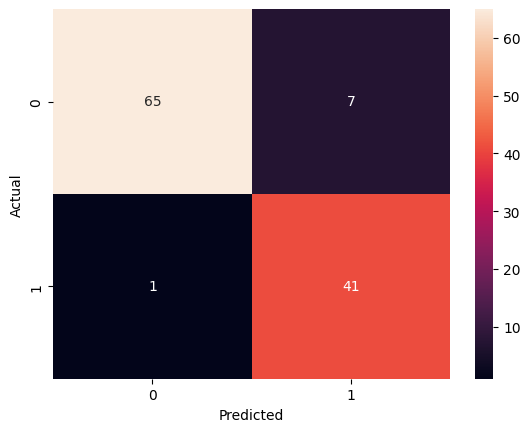

In [116]:
c_matrix_custom2=confusion_matrix(y_test, y_pred_custom2)
sns.heatmap(c_matrix_custom2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()